# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import time
import json
import openweathermapy.core as owm
from pprint import pprint
# from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# print(len(cities))
cities
#create an empty dataframe with coulumns to put coordinates into
cities_df = pd.DataFrame(columns = ["City", "Longitude", "Latitude", "Temperature", "Humidity", "Wind Speed", "Cloudiness", "Country"])
cities_df["Longitude"] = lngs
cities_df["Latitude"] = lats
cities_df


,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloudiness,Country
0,NaN,-143.006968,-49.783014,NaN,NaN,NaN,NaN,NaN
1,NaN,-170.933397,63.314531,NaN,NaN,NaN,NaN,NaN
2,NaN,17.599986,-58.293798,NaN,NaN,NaN,NaN,NaN
3,NaN,74.494764,-75.244870,NaN,NaN,NaN,NaN,NaN
4,NaN,157.640488,-44.555003,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1495,NaN,-64.256721,-36.798609,NaN,NaN,NaN,NaN,NaN
1496,NaN,-167.705299,62.705705,NaN,NaN,NaN,NaN,NaN
1497,NaN,157.210177,61.959561,NaN,NaN,NaN,NaN,NaN
1498,NaN,-36.882137,-75.995886,NaN,NaN,NaN,NaN,NaN


In [7]:
# use citypy to get city nearest the coordinates in cities_df
cities2_name=[]
countrycode=[]
for i in range(0,len(cities_df['Latitude'])):
    lat=cities_df.iloc[i]['Latitude']
    long=cities_df.iloc[i]["Longitude"]
    city=citipy.nearest_city(lat,long)
    name=city.city_name.title()
    cities2_name.append(name)
    country=city.country_code.upper()
    countrycode.append(country)
    
cities_df['City']=cities2_name
cities_df['Country']=countrycode
cities_df

,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloudiness,Country
0,Mataura,-143.006968,-49.783014,NaN,NaN,NaN,NaN,PF
1,Lavrentiya,-170.933397,63.314531,NaN,NaN,NaN,NaN,RU
2,Bredasdorp,17.599986,-58.293798,NaN,NaN,NaN,NaN,ZA
3,Saint-Philippe,74.494764,-75.244870,NaN,NaN,NaN,NaN,RE
4,Te Anau,157.640488,-44.555003,NaN,NaN,NaN,NaN,NZ
...,...,...,...,...,...,...,...,...
1495,Santa Rosa,-64.256721,-36.798609,NaN,NaN,NaN,NaN,AR
1496,Nome,-167.705299,62.705705,NaN,NaN,NaN,NaN,US
1497,Omsukchan,157.210177,61.959561,NaN,NaN,NaN,NaN,RU
1498,Ushuaia,-36.882137,-75.995886,NaN,NaN,NaN,NaN,AR


In [8]:
#Remove any duplicate city names
new_cities_df = cities_df.drop_duplicates("City", keep='first')
new_cities_df
print(type(new_cities_df))
len(new_cities_df)
new_cities_df

<class 'pandas.core.frame.DataFrame'>


,City,Longitude,Latitude,Temperature,Humidity,Wind Speed,Cloudiness,Country
0,Mataura,-143.006968,-49.783014,NaN,NaN,NaN,NaN,PF
1,Lavrentiya,-170.933397,63.314531,NaN,NaN,NaN,NaN,RU
2,Bredasdorp,17.599986,-58.293798,NaN,NaN,NaN,NaN,ZA
3,Saint-Philippe,74.494764,-75.244870,NaN,NaN,NaN,NaN,RE
4,Te Anau,157.640488,-44.555003,NaN,NaN,NaN,NaN,NZ
...,...,...,...,...,...,...,...,...
1487,Somerset,-84.432346,36.719207,NaN,NaN,NaN,NaN,US
1491,Asayita,41.329810,11.780127,NaN,NaN,NaN,NaN,ET
1494,Chamalieres,2.942310,45.856366,NaN,NaN,NaN,NaN,FR
1495,Santa Rosa,-64.256721,-36.798609,NaN,NaN,NaN,NaN,AR


In [9]:
### Perform API Calls
# * Perform a weather check on each city using a series of successive API calls.
# * Include a print log of each city as it'sbeing processed (with the city number and city name).

In [10]:
#create empty lists to store data from which to create a dataframe
temp = []
humidity =[]
clouds = []
wind = []
city4 = []
lng4 = []
lat4 = []

counter = 0
baseurl = "https://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

#iterate through the rows to get data from the api 
for index, row in new_cities_df.iterrows():
    counter +=1
    city = row["City"]
    new_url = baseurl+city+"&appid="+api_key+"&units="+units
    print("Now processing city number: "+str(counter))
    print("The city name is: "+row["City"])
    print(new_url)
    print("__________________________________________________________________________________________")
    try:
        info = requests.get(new_url).json()
#         print(info)
        city4.append(info['name'][:])
        lng4.append(info['coord']["lon"])
        lat4.append(info['coord']["lat"])
        temp.append(info['main']['temp'])
        humidity.append(info['main']['humidity'])
        clouds.append(info['clouds']['all'])
        wind.append(info['wind']['speed'])
    except (KeyError, ValueError):
        print("Missing City")
#         continue
    time.sleep(1)
    
    

# Convert  Data to DataFrame
new_cities5_df = pd.DataFrame()
new_cities5_df.assign(City=city4)
new_cities5_df["City"]=city4
new_cities5_df["Longitude"]=lng4
new_cities5_df["Latitude"]=lat4
new_cities5_df["Temperature"]=temp
new_cities5_df["Humidity"]=humidity
new_cities5_df["Cloudiness"]=clouds
new_cities5_df["Wind Speed"]=wind

# print(type(new_cities5_df))

Now processing city number: 1
The city name is: Mataura
https://api.openweathermap.org/data/2.5/weather?q=Mataura&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 2
The city name is: Lavrentiya
https://api.openweathermap.org/data/2.5/weather?q=Lavrentiya&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 3
The city name is: Bredasdorp
https://api.openweathermap.org/data/2.5/weather?q=Bredasdorp&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 4
The city name is: Saint-Philippe
https://api.openweathermap.org/data/2.5/weather?q=Saint-Philippe&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_____________________________

Now processing city number: 32
The city name is: Hobart
https://api.openweathermap.org/data/2.5/weather?q=Hobart&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 33
The city name is: Hermanus
https://api.openweathermap.org/data/2.5/weather?q=Hermanus&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 34
The city name is: Ribeira Grande
https://api.openweathermap.org/data/2.5/weather?q=Ribeira Grande&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 35
The city name is: Boden
https://api.openweathermap.org/data/2.5/weather?q=Boden&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_________________________________________

Missing City
Now processing city number: 63
The city name is: Olinda
https://api.openweathermap.org/data/2.5/weather?q=Olinda&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 64
The city name is: Fortuna
https://api.openweathermap.org/data/2.5/weather?q=Fortuna&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 65
The city name is: Sentyabrskiy
https://api.openweathermap.org/data/2.5/weather?q=Sentyabrskiy&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Missing City
Now processing city number: 66
The city name is: Tumannyy
https://api.openweathermap.org/data/2.5/weather?q=Tumannyy&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_______________

Now processing city number: 94
The city name is: Georgetown
https://api.openweathermap.org/data/2.5/weather?q=Georgetown&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 95
The city name is: Yanan
https://api.openweathermap.org/data/2.5/weather?q=Yanan&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Missing City
Now processing city number: 96
The city name is: Ponta Do Sol
https://api.openweathermap.org/data/2.5/weather?q=Ponta Do Sol&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 97
The city name is: Tasiilaq
https://api.openweathermap.org/data/2.5/weather?q=Tasiilaq&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
________________________

Now processing city number: 125
The city name is: Puerto Ayora
https://api.openweathermap.org/data/2.5/weather?q=Puerto Ayora&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 126
The city name is: Waterfoot
https://api.openweathermap.org/data/2.5/weather?q=Waterfoot&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 127
The city name is: Sulangan
https://api.openweathermap.org/data/2.5/weather?q=Sulangan&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 128
The city name is: Oranjemund
https://api.openweathermap.org/data/2.5/weather?q=Oranjemund&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_________________________

Now processing city number: 157
The city name is: Acajutla
https://api.openweathermap.org/data/2.5/weather?q=Acajutla&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 158
The city name is: Tautira
https://api.openweathermap.org/data/2.5/weather?q=Tautira&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 159
The city name is: Ilhabela
https://api.openweathermap.org/data/2.5/weather?q=Ilhabela&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 160
The city name is: Adre
https://api.openweathermap.org/data/2.5/weather?q=Adre&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_________________________________________________

Missing City
Now processing city number: 188
The city name is: Umm Lajj
https://api.openweathermap.org/data/2.5/weather?q=Umm Lajj&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 189
The city name is: Tarudant
https://api.openweathermap.org/data/2.5/weather?q=Tarudant&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Missing City
Now processing city number: 190
The city name is: Roma
https://api.openweathermap.org/data/2.5/weather?q=Roma&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 191
The city name is: Laguna
https://api.openweathermap.org/data/2.5/weather?q=Laguna&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_________________________

Now processing city number: 220
The city name is: Elko
https://api.openweathermap.org/data/2.5/weather?q=Elko&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 221
The city name is: Winnemucca
https://api.openweathermap.org/data/2.5/weather?q=Winnemucca&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 222
The city name is: Ixtapa
https://api.openweathermap.org/data/2.5/weather?q=Ixtapa&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 223
The city name is: Muros
https://api.openweathermap.org/data/2.5/weather?q=Muros&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_____________________________________________________

Now processing city number: 252
The city name is: Senmonorom
https://api.openweathermap.org/data/2.5/weather?q=Senmonorom&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Missing City
Now processing city number: 253
The city name is: Kaitangata
https://api.openweathermap.org/data/2.5/weather?q=Kaitangata&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 254
The city name is: Port Lincoln
https://api.openweathermap.org/data/2.5/weather?q=Port Lincoln&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 255
The city name is: Lethem
https://api.openweathermap.org/data/2.5/weather?q=Lethem&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
______________

Now processing city number: 284
The city name is: Korla
https://api.openweathermap.org/data/2.5/weather?q=Korla&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Missing City
Now processing city number: 285
The city name is: Mbandaka
https://api.openweathermap.org/data/2.5/weather?q=Mbandaka&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 286
The city name is: Paralimni
https://api.openweathermap.org/data/2.5/weather?q=Paralimni&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 287
The city name is: Cockburn Town
https://api.openweathermap.org/data/2.5/weather?q=Cockburn Town&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
____________________

Now processing city number: 315
The city name is: Severo-Kurilsk
https://api.openweathermap.org/data/2.5/weather?q=Severo-Kurilsk&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 316
The city name is: Souillac
https://api.openweathermap.org/data/2.5/weather?q=Souillac&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 317
The city name is: Saint-Michel-Des-Saints
https://api.openweathermap.org/data/2.5/weather?q=Saint-Michel-Des-Saints&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 318
The city name is: Mokhsogollokh
https://api.openweathermap.org/data/2.5/weather?q=Mokhsogollokh&appid=72498bfd3a73e620617d0fe6aea746b9&un

Now processing city number: 346
The city name is: Sorong
https://api.openweathermap.org/data/2.5/weather?q=Sorong&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 347
The city name is: Wajir
https://api.openweathermap.org/data/2.5/weather?q=Wajir&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 348
The city name is: Staryy Nadym
https://api.openweathermap.org/data/2.5/weather?q=Staryy Nadym&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 349
The city name is: Sawtell
https://api.openweathermap.org/data/2.5/weather?q=Sawtell&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
___________________________________________

Now processing city number: 377
The city name is: Aroysund
https://api.openweathermap.org/data/2.5/weather?q=Aroysund&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 378
The city name is: Lasa
https://api.openweathermap.org/data/2.5/weather?q=Lasa&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 379
The city name is: Grindavik
https://api.openweathermap.org/data/2.5/weather?q=Grindavik&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 380
The city name is: Guarapari
https://api.openweathermap.org/data/2.5/weather?q=Guarapari&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
___________________________________________

Now processing city number: 408
The city name is: Arcachon
https://api.openweathermap.org/data/2.5/weather?q=Arcachon&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 409
The city name is: Orumiyeh
https://api.openweathermap.org/data/2.5/weather?q=Orumiyeh&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 410
The city name is: Ust-Shonosha
https://api.openweathermap.org/data/2.5/weather?q=Ust-Shonosha&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 411
The city name is: Morganton
https://api.openweathermap.org/data/2.5/weather?q=Morganton&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_____________________________

Now processing city number: 439
The city name is: Diffa
https://api.openweathermap.org/data/2.5/weather?q=Diffa&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 440
The city name is: Urdoma
https://api.openweathermap.org/data/2.5/weather?q=Urdoma&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 441
The city name is: Margate
https://api.openweathermap.org/data/2.5/weather?q=Margate&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 442
The city name is: Sao Joao De Pirabas
https://api.openweathermap.org/data/2.5/weather?q=Sao Joao De Pirabas&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_____________________________

Now processing city number: 470
The city name is: Mwinilunga
https://api.openweathermap.org/data/2.5/weather?q=Mwinilunga&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 471
The city name is: Kiunga
https://api.openweathermap.org/data/2.5/weather?q=Kiunga&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 472
The city name is: Condega
https://api.openweathermap.org/data/2.5/weather?q=Condega&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 473
The city name is: Najran
https://api.openweathermap.org/data/2.5/weather?q=Najran&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_____________________________________________

Now processing city number: 501
The city name is: Kununurra
https://api.openweathermap.org/data/2.5/weather?q=Kununurra&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 502
The city name is: Chara
https://api.openweathermap.org/data/2.5/weather?q=Chara&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 503
The city name is: Marzuq
https://api.openweathermap.org/data/2.5/weather?q=Marzuq&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 504
The city name is: Bonthe
https://api.openweathermap.org/data/2.5/weather?q=Bonthe&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
___________________________________________________

Now processing city number: 532
The city name is: Sorvag
https://api.openweathermap.org/data/2.5/weather?q=Sorvag&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Missing City
Now processing city number: 533
The city name is: Necochea
https://api.openweathermap.org/data/2.5/weather?q=Necochea&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 534
The city name is: Trincomalee
https://api.openweathermap.org/data/2.5/weather?q=Trincomalee&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 535
The city name is: Nouakchott
https://api.openweathermap.org/data/2.5/weather?q=Nouakchott&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
____________________

Now processing city number: 563
The city name is: Acurenam
https://api.openweathermap.org/data/2.5/weather?q=Acurenam&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 564
The city name is: Maniitsoq
https://api.openweathermap.org/data/2.5/weather?q=Maniitsoq&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 565
The city name is: Conde
https://api.openweathermap.org/data/2.5/weather?q=Conde&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 566
The city name is: Huadian
https://api.openweathermap.org/data/2.5/weather?q=Huadian&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
_____________________________________________

Now processing city number: 595
The city name is: Vardo
https://api.openweathermap.org/data/2.5/weather?q=Vardo&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 596
The city name is: Jujuy
https://api.openweathermap.org/data/2.5/weather?q=Jujuy&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Missing City
Now processing city number: 597
The city name is: Shelton
https://api.openweathermap.org/data/2.5/weather?q=Shelton&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________________________________________________________
Now processing city number: 598
The city name is: Ternate
https://api.openweathermap.org/data/2.5/weather?q=Ternate&appid=72498bfd3a73e620617d0fe6aea746b9&units=imperial
__________________________________________

In [12]:
# Display sample of the DataFrame *** There are 543 cities out of the 613 in this analysis
new_cities5_df

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Mataura,168.86,-46.19,43.00,92,98,4.00
1,Lavrentiya,-170.99,65.58,38.24,80,66,13.60
2,Bredasdorp,20.04,-34.53,59.00,82,76,5.82
3,Saint-Philippe,-73.48,45.36,53.42,58,75,10.29
4,Te Anau,167.72,-45.41,38.24,76,89,1.23
...,...,...,...,...,...,...,...
538,Marawi,124.29,8.00,75.00,89,84,8.01
539,Somerset,-71.13,41.77,68.79,77,90,9.17
540,Chamalieres,3.06,45.78,54.14,71,90,4.70
541,Santa Rosa,-64.29,-36.62,64.21,22,33,11.23


In [22]:
# Export the city data into a .csv.
output_data_file = new_cities5_df
output_data_file.to_csv("../output_data/cities.csv", index=False, header=True)
output_data_file

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Mataura,168.86,-46.19,43.00,92,98,4.00
1,Lavrentiya,-170.99,65.58,38.24,80,66,13.60
2,Bredasdorp,20.04,-34.53,59.00,82,76,5.82
3,Saint-Philippe,-73.48,45.36,53.42,58,75,10.29
4,Te Anau,167.72,-45.41,38.24,76,89,1.23
...,...,...,...,...,...,...,...
538,Marawi,124.29,8.00,75.00,89,84,8.01
539,Somerset,-71.13,41.77,68.79,77,90,9.17
540,Chamalieres,3.06,45.78,54.14,71,90,4.70
541,Santa Rosa,-64.29,-36.62,64.21,22,33,11.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

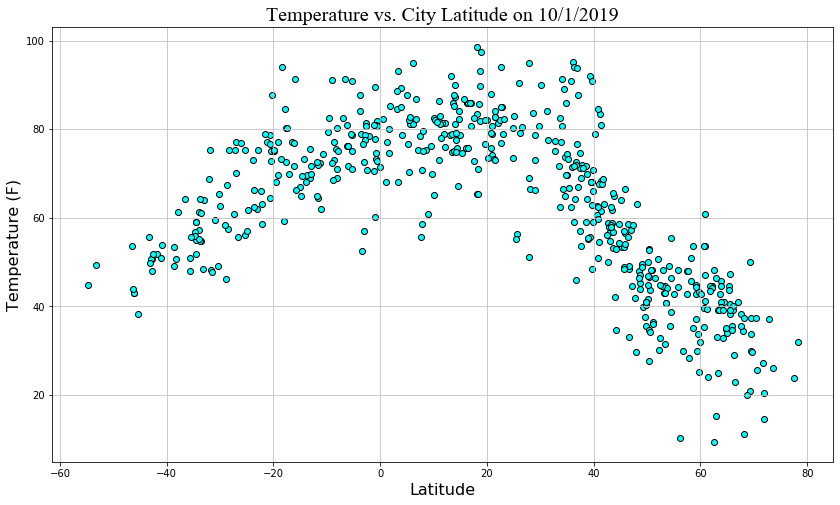

In [23]:
# Latitude vs. Temperature (F)
matplotlib.rc('figure', figsize=(14, 8))
plt.scatter(new_cities5_df["Latitude"],new_cities5_df["Temperature"],edgecolors="black",facecolors="aqua")
plt.title("Temperature vs. City Latitude on 10/1/2019",fontname="Times New Roman", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Temperature (F)", fontsize=16)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="silver")
plt.savefig("../images/Latitude_vs_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

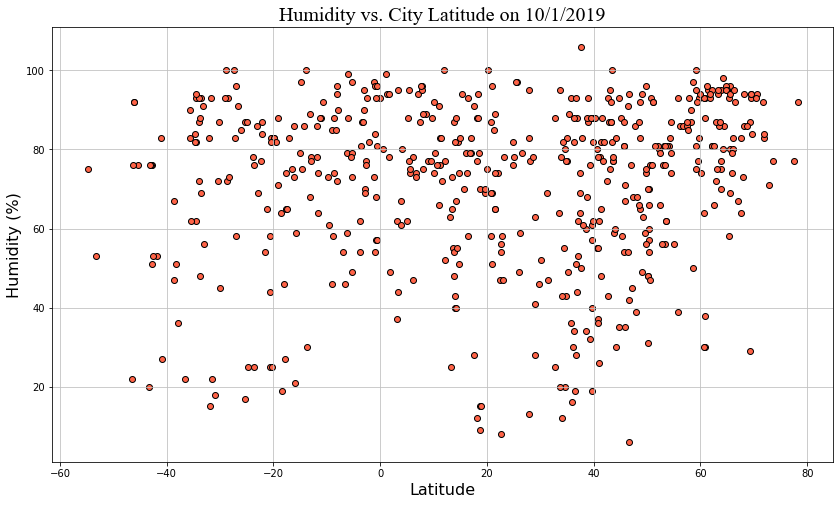

In [18]:
# Latitude Vs. Humidity
import matplotlib
matplotlib.rc('figure', figsize=(14, 8))
plt.scatter(new_cities5_df["Latitude"],new_cities5_df["Humidity"],edgecolors="black",facecolors="tomato")
plt.title("Humidity vs. City Latitude on 10/1/2019",fontname="Times New Roman", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="silver")
plt.savefig("../images/Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

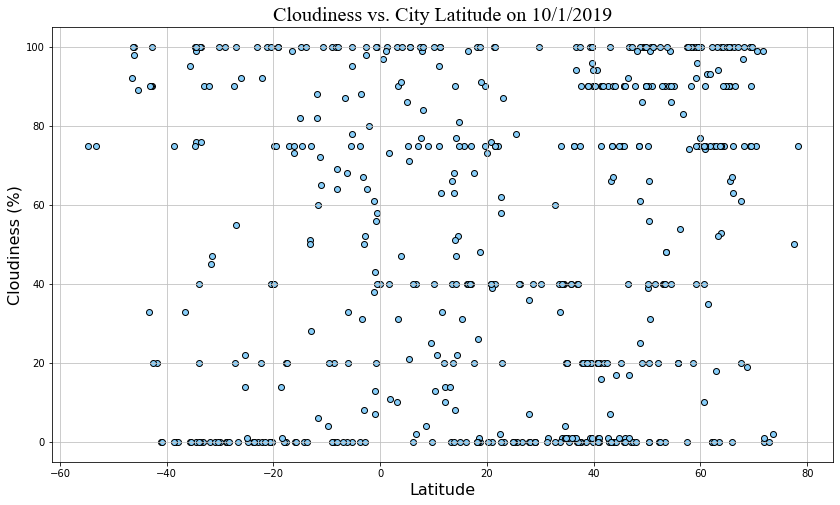

In [19]:
# Latitude Vs. Cloudiness
import matplotlib
matplotlib.rc('figure', figsize=(14, 8))
plt.scatter(new_cities5_df["Latitude"],new_cities5_df["Cloudiness"],edgecolors="black",facecolors="lightskyblue")
plt.title("Cloudiness vs. City Latitude on 10/1/2019",fontname="Times New Roman", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="silver")
plt.savefig("../images/Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

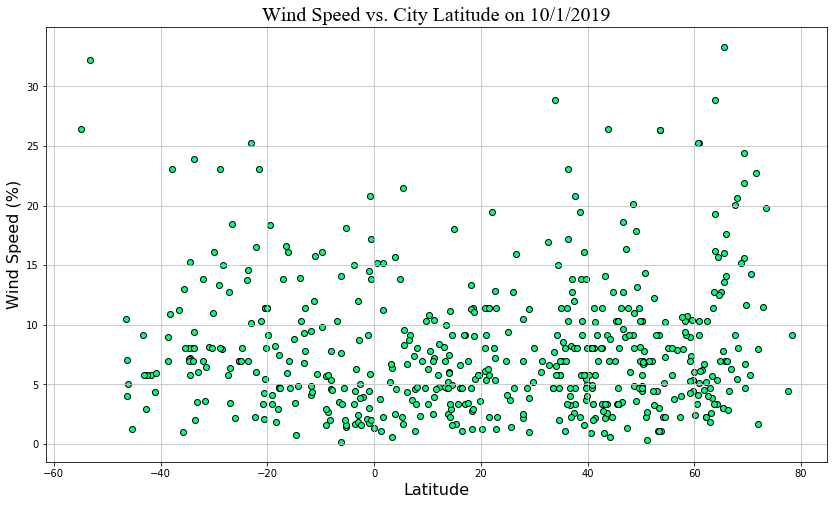

In [20]:
# Latitude Vs. Wind Speed
import matplotlib
matplotlib.rc('figure', figsize=(14, 8))
plt.scatter(new_cities5_df["Latitude"],new_cities5_df["Wind Speed"],edgecolors="black",facecolors="springgreen")
plt.title("Wind Speed vs. City Latitude on 10/1/2019",fontname="Times New Roman", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Wind Speed (%)", fontsize=16)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="silver")
plt.savefig("../images/Latitude_vs_WindSpeed.png")
plt.show()